<a href="https://www.kaggle.com/code/ivancanepa/neural-network-keras-predicti-n-crab-age?scriptVersionId=132263223" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e16/sample_submission.csv
/kaggle/input/playground-series-s3e16/train.csv
/kaggle/input/playground-series-s3e16/test.csv


# **📚Importación de bibliotecas y carga de datos**

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from matplotlib import pyplot as plt
import seaborn as sns


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
# Load data
train = pd.read_csv("/kaggle/input/playground-series-s3e16/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s3e16/test.csv")

# **🔬Análisis Exploratorio de Datos**

In [4]:
# Brief EDA
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB
None


In [5]:
# Displaying summary statistics
print(train.describe(include='all'))

                  id    Sex        Length      Diameter        Height  \
count   74051.000000  74051  74051.000000  74051.000000  74051.000000   
unique           NaN      3           NaN           NaN           NaN   
top              NaN      M           NaN           NaN           NaN   
freq             NaN  27084           NaN           NaN           NaN   
mean    37025.000000    NaN      1.317460      1.024496      0.348089   
std     21376.826729    NaN      0.287757      0.237396      0.092034   
min         0.000000    NaN      0.187500      0.137500      0.000000   
25%     18512.500000    NaN      1.150000      0.887500      0.300000   
50%     37025.000000    NaN      1.375000      1.075000      0.362500   
75%     55537.500000    NaN      1.537500      1.200000      0.412500   
max     74050.000000    NaN      2.012815      1.612500      2.825000   

              Weight  Shucked Weight  Viscera Weight  Shell Weight  \
count   74051.000000    74051.000000    74051.000000 

In [6]:
# Checking for null values
print(train.isnull().sum())

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64


In [7]:
# Checking distributions of numeric and categorical variables
numeric_features = train.select_dtypes(include=['float64']).columns
categorical_features = train.select_dtypes(include=['object']).columns



# **📈Plotting distributions**


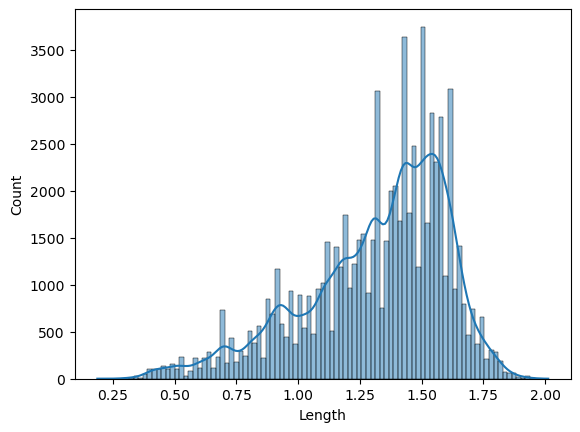

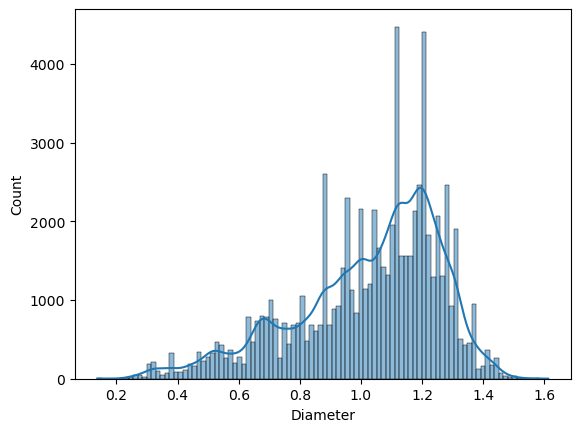

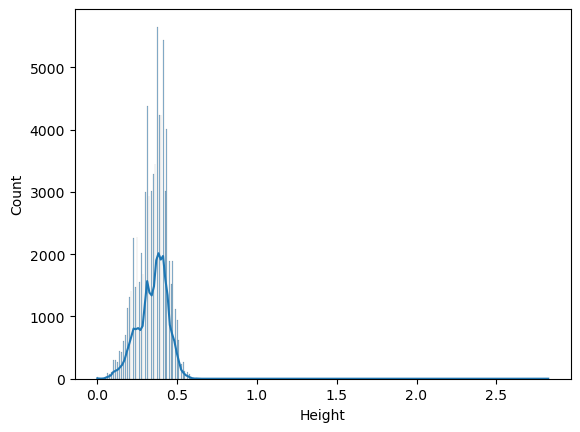

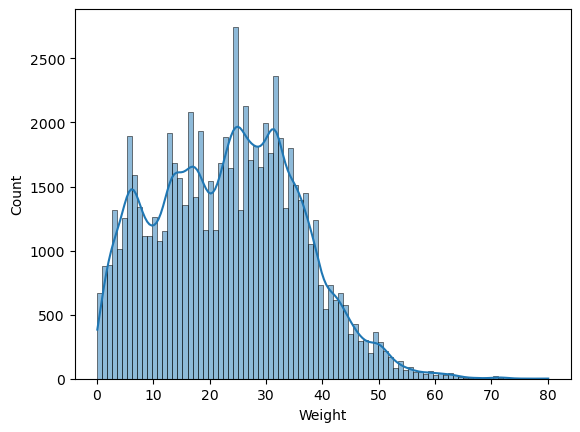

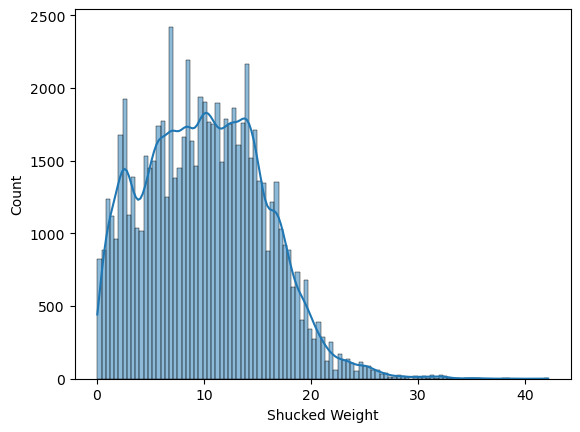

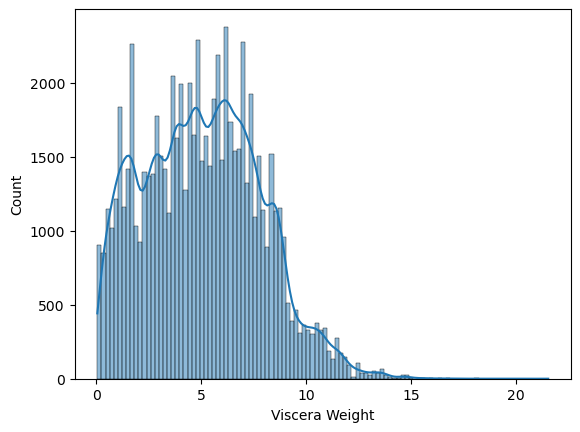

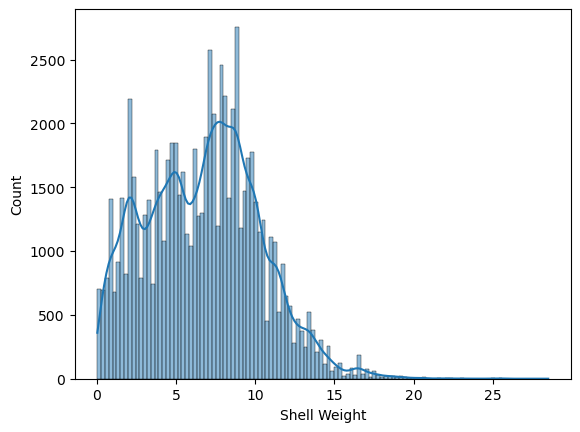

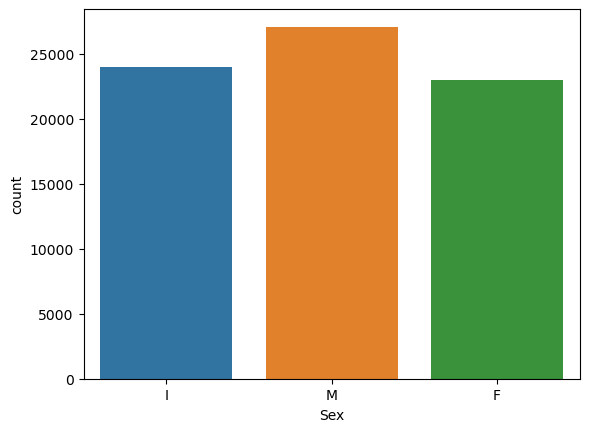

In [8]:
# Plotting distributions
for feature in numeric_features:
    sns.histplot(data=train, x=feature, kde=True)
    plt.show()

for feature in categorical_features:
    sns.countplot(data=train, x=feature)
    plt.show()

# **🔎Checking correlations**


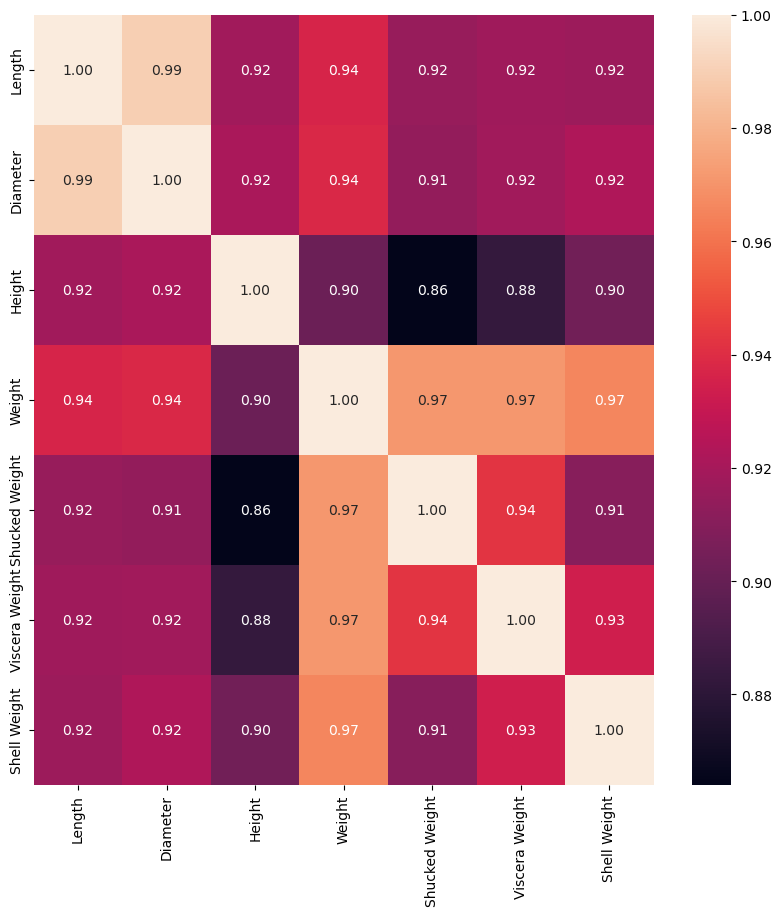

In [9]:
plt.figure(figsize=(10, 10))
sns.heatmap(train[numeric_features].corr(), annot=True, fmt=".2f")
plt.show()

## **📝Preprocessing data**



In [10]:
# Preprocess data
train = pd.get_dummies(train)
test = pd.get_dummies(test)

# Separate features and target
X_train = train.drop(columns="Age")
y_train = train["Age"]

# **📊Model & Plotting**

In [11]:
# neural network architecture
def create_model():
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_absolute_error', optimizer='adam')
    return model

model = KerasRegressor(build_fn=create_model, epochs=30, batch_size=12, verbose=1)
model.fit(X_train, y_train)

# Predict on test set
predictions = model.predict(test)
predictions = np.round(predictions)


/tmp/ipykernel_24/3091259686.py:10: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, epochs=30, batch_size=12, verbose=1)


Epoch 1/30
6171/6171 [==============================] - 27s 3ms/step - loss: 35.6078
Epoch 2/30
6171/6171 [==============================] - 19s 3ms/step - loss: 5.7399
Epoch 3/30
6171/6171 [==============================] - 19s 3ms/step - loss: 2.4370
Epoch 4/30
6171/6171 [==============================] - 20s 3ms/step - loss: 1.9645
Epoch 5/30
6171/6171 [==============================] - 19s 3ms/step - loss: 1.8448
Epoch 6/30
6171/6171 [==============================] - 19s 3ms/step - loss: 1.8153
Epoch 7/30
6171/6171 [==============================] - 19s 3ms/step - loss: 1.7943
Epoch 8/30
6171/6171 [==============================] - 19s 3ms/step - loss: 1.7827
Epoch 9/30
6171/6171 [==============================] - 19s 3ms/step - loss: 1.7663
Epoch 10/30
6171/6171 [==============================] - 19s 3ms/step - loss: 1.7522
Epoch 11/30
6171/6171 [==============================] - 19s 3ms/step - loss: 1.7313
Epoch 12/30
6171/6171 [==============================] - 19s 3ms/step - l

Epoch 1/10
7405/7405 [==============================] - 26s 3ms/step - loss: 84.3459 - val_loss: 17.3212
Epoch 2/10
7405/7405 [==============================] - 25s 3ms/step - loss: 13.4319 - val_loss: 7.7189
Epoch 3/10
7405/7405 [==============================] - 25s 3ms/step - loss: 3.6526 - val_loss: 1.9697
Epoch 4/10
7405/7405 [==============================] - 26s 3ms/step - loss: 2.1445 - val_loss: 2.0469
Epoch 5/10
7405/7405 [==============================] - 25s 3ms/step - loss: 1.8989 - val_loss: 1.8511
Epoch 6/10
7405/7405 [==============================] - 23s 3ms/step - loss: 1.8359 - val_loss: 1.8273
Epoch 7/10
7405/7405 [==============================] - 25s 3ms/step - loss: 1.7984 - val_loss: 1.7016
Epoch 8/10
7405/7405 [==============================] - 23s 3ms/step - loss: 1.7737 - val_loss: 1.7040
Epoch 9/10
7405/7405 [==============================] - 25s 3ms/step - loss: 1.7648 - val_loss: 1.6845
Epoch 10/10
7405/7405 [==============================] - 25s 3ms/step 

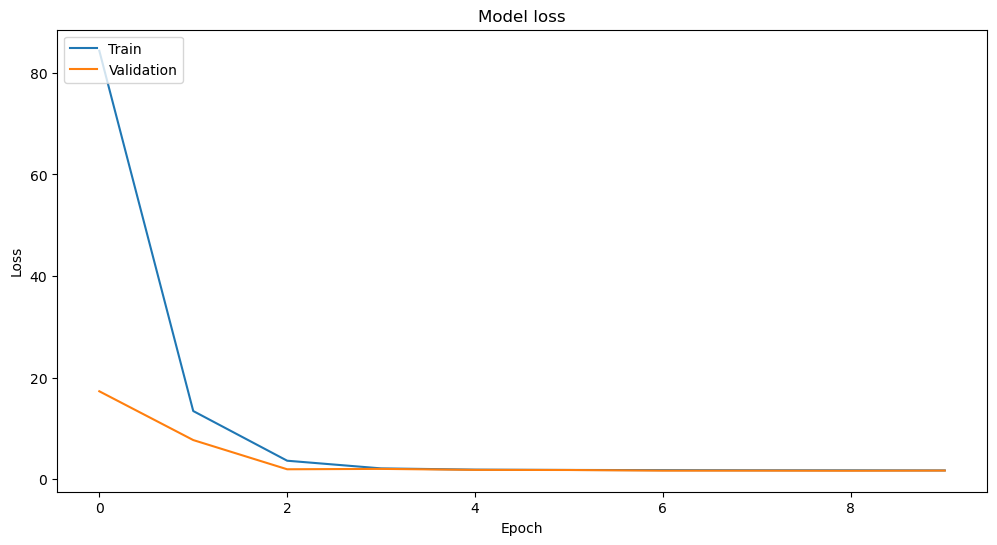

In [12]:

# Split train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=8, verbose=1)

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()




In [13]:
# Predict on train set
train_predictions = model.predict(X_train)

# Calculate error
train_error = mean_absolute_error(y_train, train_predictions)
print(f"Train error: {train_error}")




4937/4937 [==============================] - 7s 1ms/step
Train error: 1.7096388077349538


In [14]:

# Predict on validation set
val_predictions = model.predict(X_val)

# Calculate error
val_error = mean_absolute_error(y_val, val_predictions)
print(f"Validation error: {val_error}")

1235/1235 [==============================] - 2s 2ms/step
Validation error: 1.7151060261480733


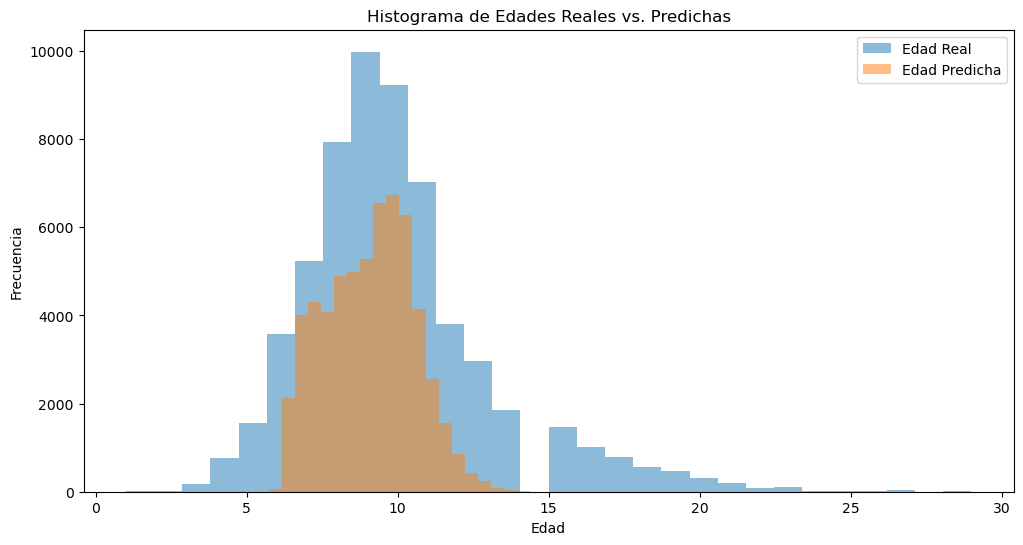

In [15]:
plt.figure(figsize=(12,6))
plt.hist(y_train, bins=30, alpha=0.5, label='Edad Real')
plt.hist(train_predictions, bins=21, alpha=0.5, label='Edad Predicha')
plt.legend(loc='upper right')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edades Reales vs. Predichas')
plt.show()

In [16]:
assert len(predictions) == 49368, f"Expected 49368 predictions, but got {len(predictions)}"

submission_df = pd.DataFrame({'id': test['id'], 'Age': predictions})

submission_df.to_csv('submissionv3.csv', index=False)




In [17]:
 fin = pd.read_csv("/kaggle/working/submissionv3.csv")

In [18]:
fin.head(10)

,id,Age
0,74051,8.0
1,74052,9.0
2,74053,10.0
3,74054,11.0
4,74055,9.0
5,74056,12.0
6,74057,13.0
7,74058,9.0
8,74059,12.0
9,74060,11.0
